In [9]:
from config import weather_api_key
import requests
from citipy import citipy
from datetime import datetime
import time
import numpy as np

In [10]:
#Create lat and lngs
lats = np.random.uniform(-90.00, 90.00, size=1500)
lngs = np.random.uniform(-90.00, 90.00, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-43.118854289354275 -47.10759647112175
-18.57568801804382 -42.951478517601586
2.2826478676878423 2.0035000870025073
69.3747565658623 -37.99363453524067
37.84742943243053 -36.00724886373434
-54.612386446682414 76.11610352144103
42.699334585449634 -10.70728081002153
32.34846659700614 -25.250785511206473
28.989018746704218 -57.05175913821288
-87.81447243299706 6.135320472227278
46.21329220177773 55.68018646430235
5.254633107252118 -82.310505976277
-36.834465356145515 -60.927977222960976
25.411535477266767 87.45304151300252
43.96923065236362 -40.31344357158198
-60.49733040842263 56.693028090897485
-14.407870001820243 -2.5374101441988017
33.406744875427805 -45.7097187318501
-86.33008322625587 -17.04146132958175
-52.315181813597476 52.38962852507103
49.69278270483926 39.76466999403999
-38.517858776889014 64.67088859113488
87.84382556496638 22.422230667425424
-37.58562070649363 13.49182872650519
2.42528724681371 -0.6307390898970766
62.92930004965345 84.4117503243055
-40.57839061732216 62.1832

70.68687936478341 44.02314757248834
5.946794572717607 11.735946726370017
47.85130251921973 -55.418017359394504
15.523554769778727 -73.76724360183503
9.967917871127895 69.96807276695188
-52.92215224106196 45.92378946855939
20.310092151665344 -55.28304425349083
-48.716249381459846 -26.892517938575587
-30.45479251814728 -88.82065766505067
-30.827461195514296 -59.38239890675574
-80.13983521638622 -46.79892200054083
63.289553633475606 76.92626556703536
67.4938910717564 81.0805542964192
9.481261636322046 -35.69959304021937
13.931285627468895 46.2569299517173
-71.09282369041007 86.54909375799923
-83.19381172470898 -44.95831001429124
-58.56541328426027 14.258347003646676
-44.96697720155125 -70.74868226909877
39.36305017617033 89.59802344451174
28.492774917115597 22.27478745863675
42.27757108297939 52.12294445504679
-48.77228894141766 -64.51032697318061
89.71769029597579 10.015414962935935
-87.88141303488108 -74.07517351871795
-41.91440720202117 10.053570132551641
-15.837881054592614 23.6864662

-33.655693116622494 88.44102980763444
-20.69519023054856 16.671112975885848
-12.583883418843612 -36.47052063367836
-85.54374634818737 -55.23480757653451
33.38069130054389 47.328133421645674
74.36585645326335 -15.751677026289244
58.36277789395663 -45.292602347073675
46.92816861717853 -57.624531573225504
-22.165131572486985 23.038673875303104
18.169379218417177 76.25192370859537
69.2256040608911 12.13722073938051
59.35393949311694 -24.24573728807016
27.73011419765089 84.94672207809691
56.805734732350885 76.35793062714822
-23.71730415238136 -25.338378190840217
71.22740995569234 -8.634053777918652
-52.40862028802228 46.02094141989318
-81.55151842534994 27.41281354403131
14.932963250040473 -65.4839246615806
-42.30848721846936 72.29145206395489
-57.77828044849037 32.899250994078045
-53.1161319325228 -81.29567067655532
-58.77130923678097 -52.74530808700946
-83.57745866289008 -13.898011987289408
-12.278845505272358 -54.033676428627636
2.8290026082724893 47.5335762261916
34.49097448226868 40.80

In [13]:
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rocha
Processing Record 2 of Set 1 | sabinopolis
Processing Record 3 of Set 1 | anloga
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | muros
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | beyneu
Processing Record 12 of Set 1 | burica
City not found. Skipping...
Processing Record 13 of Set 1 | olavarria
Processing Record 14 of Set 1 | katihar
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | kantemirovka
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | cape town
Processing Record 23 of 

Processing Record 40 of Set 4 | tromso
Processing Record 41 of Set 4 | himare
Processing Record 42 of Set 4 | saltpond
Processing Record 43 of Set 4 | lannion
Processing Record 44 of Set 4 | san luis
Processing Record 45 of Set 4 | ariquemes
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | hammerfest
Processing Record 48 of Set 4 | lasa
Processing Record 49 of Set 4 | krasnoturinsk
Processing Record 50 of Set 4 | akhtubinsk
Processing Record 1 of Set 5 | maracacume
Processing Record 2 of Set 5 | ratnagiri
Processing Record 3 of Set 5 | messina
Processing Record 4 of Set 5 | snasa
Processing Record 5 of Set 5 | namibe
Processing Record 6 of Set 5 | purranque
Processing Record 7 of Set 5 | inhambane
Processing Record 8 of Set 5 | maceio
Processing Record 9 of Set 5 | moose factory
Processing Record 10 of Set 5 | mattru
Processing Record 11 of Set 5 | angoche
Processing Record 12 of Set 5 | bull savanna
Processing Record 13 of Set 5 | methoni
Processing Record 14 

Processing Record 25 of Set 8 | lahij
Processing Record 26 of Set 8 | coihaique
Processing Record 27 of Set 8 | korla
Processing Record 28 of Set 8 | kuryk
Processing Record 29 of Set 8 | senanga
Processing Record 30 of Set 8 | mugan
Processing Record 31 of Set 8 | rawson
Processing Record 32 of Set 8 | cristalina
Processing Record 33 of Set 8 | kutum
Processing Record 34 of Set 8 | mastung
Processing Record 35 of Set 8 | piney green
Processing Record 36 of Set 8 | monteiro
Processing Record 37 of Set 8 | normandin
Processing Record 38 of Set 8 | zemetchino
Processing Record 39 of Set 8 | saint pete beach
Processing Record 40 of Set 8 | nacala
Processing Record 41 of Set 8 | kashary
Processing Record 42 of Set 8 | nushki
Processing Record 43 of Set 8 | atlantic city
Processing Record 44 of Set 8 | bubaque
Processing Record 45 of Set 8 | pataias
Processing Record 46 of Set 8 | cozumel
Processing Record 47 of Set 8 | saint-georges
Processing Record 48 of Set 8 | comendador
Processing Rec

Processing Record 14 of Set 12 | jamsa
Processing Record 15 of Set 12 | altamira
Processing Record 16 of Set 12 | falmouth
Processing Record 17 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 18 of Set 12 | santa cruz de tenerife
Processing Record 19 of Set 12 | hoshiarpur
Processing Record 20 of Set 12 | acarau
Processing Record 21 of Set 12 | rabo de peixe
Processing Record 22 of Set 12 | stornoway
Processing Record 23 of Set 12 | sarakhs
Processing Record 24 of Set 12 | sayyan
Processing Record 25 of Set 12 | sinkat
City not found. Skipping...
Processing Record 26 of Set 12 | shirgaon
Processing Record 27 of Set 12 | porto nacional
Processing Record 28 of Set 12 | sao felix do xingu
Processing Record 29 of Set 12 | kortkeros
Processing Record 30 of Set 12 | atar
Processing Record 31 of Set 12 | las palmas
Processing Record 32 of Set 12 | chulym
Processing Record 33 of Set 12 | klyuchi
Processing Record 34 of Set 12 | svarstad
Processing Record 35 of Set 12 | nioaq

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
import pandas as pd
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rocha,-34.4833,-54.3333,52.30,88,53,7.34,UY,2022-10-04 22:02:27
1,Sabinopolis,-18.6661,-43.0839,70.90,77,43,2.98,BR,2022-10-04 22:02:28
2,Anloga,5.7947,0.8973,77.95,89,73,8.68,GH,2022-10-04 22:02:29
3,Tasiilaq,65.6145,-37.6368,35.76,65,49,7.47,GL,2022-10-04 22:01:29
4,Ribeira Grande,38.5167,-28.7000,71.85,79,74,7.58,PT,2022-10-04 22:00:00
5,Souillac,-20.5167,57.5167,70.56,75,58,11.52,MU,2022-10-04 22:02:30
6,Muros,42.7762,-9.0603,56.08,90,10,1.54,ES,2022-10-04 22:02:31
7,Vila Franca Do Campo,37.7167,-25.4333,74.19,93,35,6.69,PT,2022-10-04 22:02:31
8,Saint George,37.1041,-113.5841,88.43,23,0,4.00,US,2022-10-04 22:00:25
9,Hermanus,-34.4187,19.2345,51.80,69,2,0.38,ZA,2022-10-04 22:02:33


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rocha,UY,2022-10-04 22:02:27,-34.4833,-54.3333,52.30,88,53,7.34
1,Sabinopolis,BR,2022-10-04 22:02:28,-18.6661,-43.0839,70.90,77,43,2.98
2,Anloga,GH,2022-10-04 22:02:29,5.7947,0.8973,77.95,89,73,8.68
3,Tasiilaq,GL,2022-10-04 22:01:29,65.6145,-37.6368,35.76,65,49,7.47
4,Ribeira Grande,PT,2022-10-04 22:00:00,38.5167,-28.7000,71.85,79,74,7.58


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

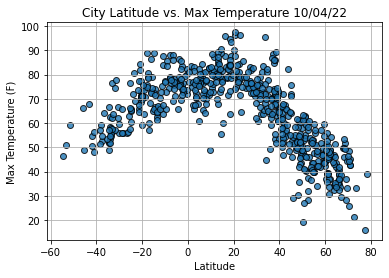

In [22]:
# Import time module
import time
import matplotlib.pyplot as plt
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

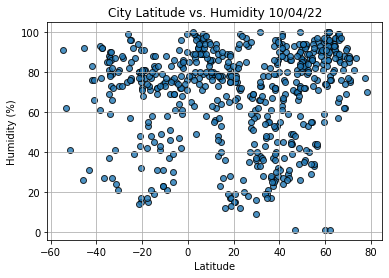

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


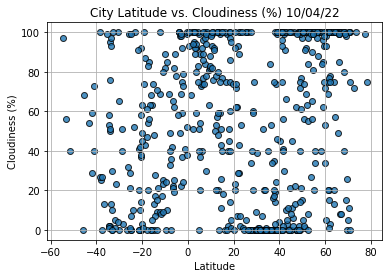

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

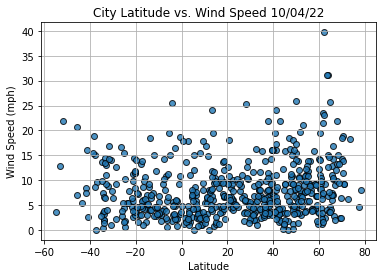

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [48]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [49]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [50]:
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2022-10-04 22:00:35
Lat                        42.097
Lng                      -79.2353
Max Temp                    58.71
Humidity                       37
Cloudiness                     99
Wind Speed                    3.0
Name: 13, dtype: object

In [51]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
588     True
589     True
590     True
591     True
592     True
Name: Lat, Length: 593, dtype: bool

In [52]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Anloga,GH,2022-10-04 22:02:29,5.7947,0.8973,77.95,89,73,8.68
3,Tasiilaq,GL,2022-10-04 22:01:29,65.6145,-37.6368,35.76,65,49,7.47
4,Ribeira Grande,PT,2022-10-04 22:00:00,38.5167,-28.7000,71.85,79,74,7.58
6,Muros,ES,2022-10-04 22:02:31,42.7762,-9.0603,56.08,90,10,1.54
7,Vila Franca Do Campo,PT,2022-10-04 22:02:31,37.7167,-25.4333,74.19,93,35,6.69


In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

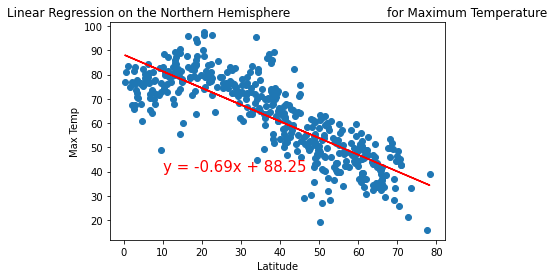

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

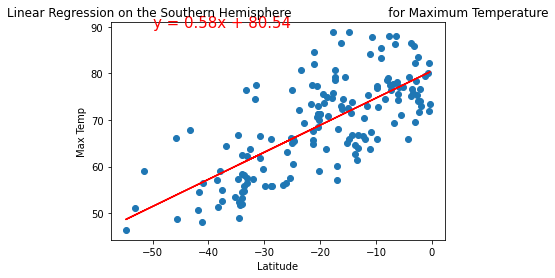

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

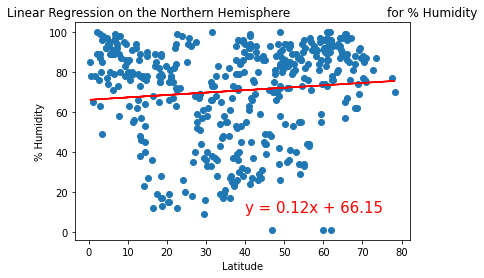

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

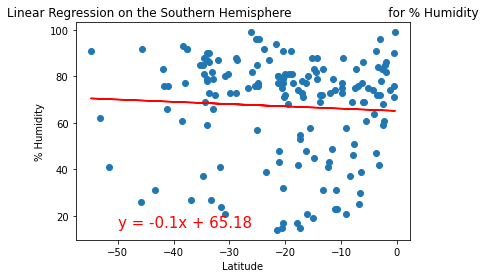

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

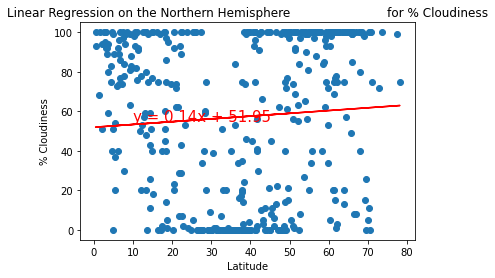

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

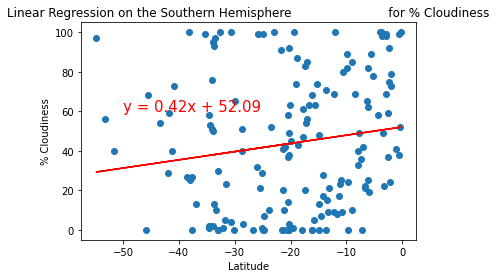

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

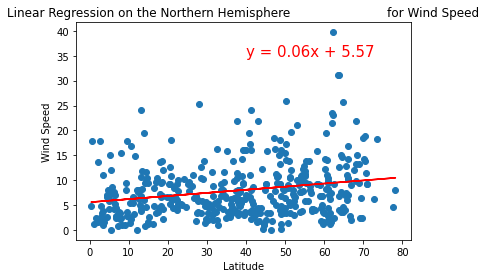

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

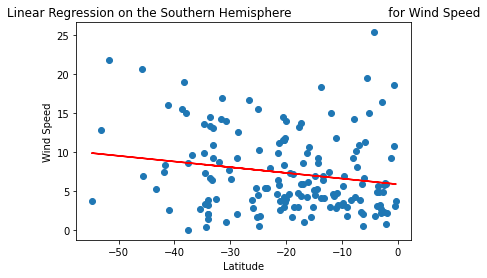

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))